yt : [INFO     ] 2025-05-31 14:23:11,202 Parameters: current_time              = 500000.0
yt : [INFO     ] 2025-05-31 14:23:11,203 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-05-31 14:23:11,204 Parameters: domain_left_edge          = [-16.5 -16.5 -16.5]
yt : [INFO     ] 2025-05-31 14:23:11,206 Parameters: domain_right_edge         = [15.5 15.5 15.5]


4.4.0
[('boxlib', 'struct_fact_rhoA_rhoA'), ('boxlib', 'struct_fact_rhoB_rhoB'), ('boxlib', 'struct_fact_uAx_uAx'), ('boxlib', 'struct_fact_uAy_uAy'), ('boxlib', 'struct_fact_uAz_uAz'), ('boxlib', 'struct_fact_uBx_uBx'), ('boxlib', 'struct_fact_uBy_uBy'), ('boxlib', 'struct_fact_uBz_uBz')]
[[[0.95060145 1.00382486 1.03163252 ... 1.03674634 1.03163252 1.00382486]
  [1.00523365 1.00146966 1.0066867  ... 1.0094056  0.98827146 0.98571825]
  [1.00736784 1.0114966  0.97009793 ... 1.00081011 1.01821164 0.97538842]
  ...
  [0.99405931 1.00600775 1.00128922 ... 1.0295243  1.02815051 0.99002795]
  [1.00736784 0.97538842 1.01821164 ... 0.99337442 0.97009793 1.0114966 ]
  [1.00523365 0.98571825 0.98827146 ... 0.95148289 1.0066867  1.00146966]]

 [[1.03162783 1.00487405 1.01624928 ... 0.99661204 0.98240505 0.99261444]
  [1.02145119 0.97784178 1.03789759 ... 0.97651423 0.99503588 1.01102343]
  [1.01034368 1.02776411 1.0411165  ... 1.02949624 0.97957879 0.98460778]
  ...
  [1.0180032  1.03589507 1.00

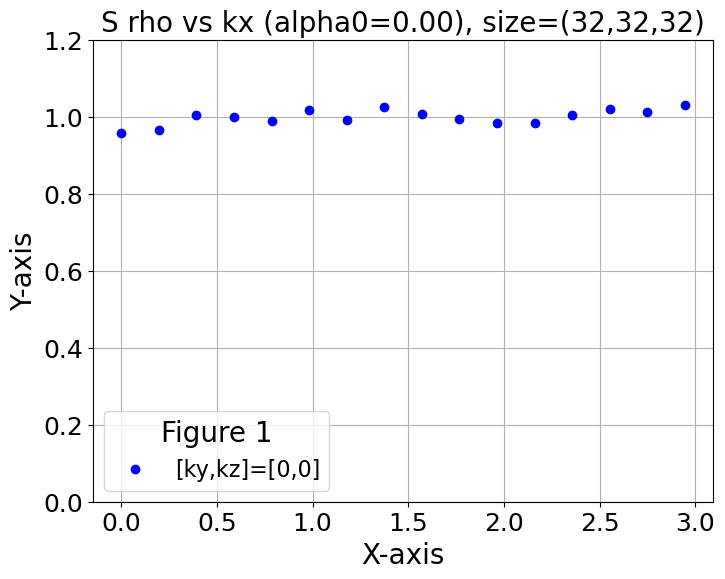

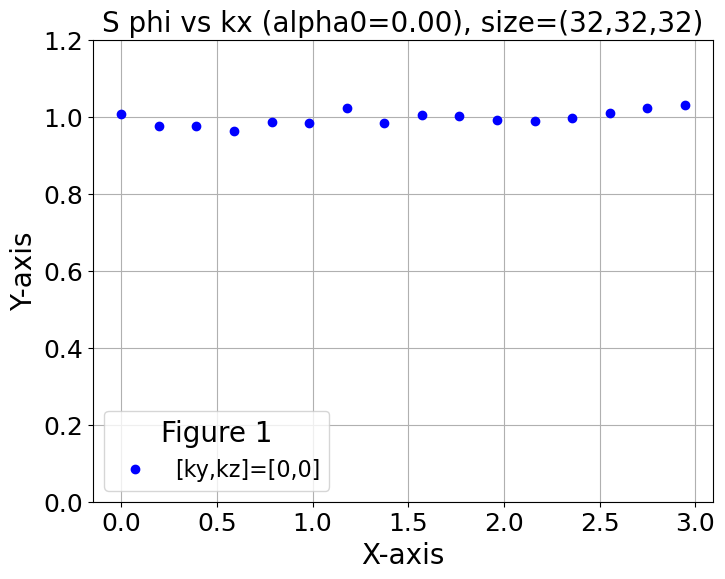

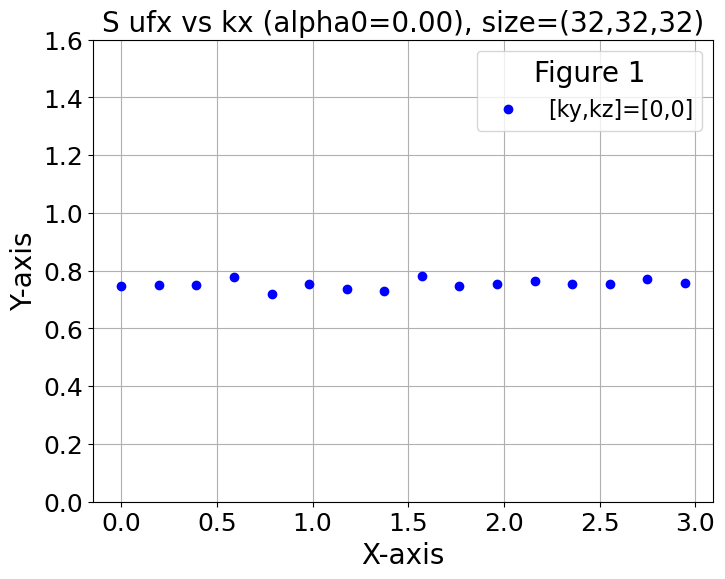

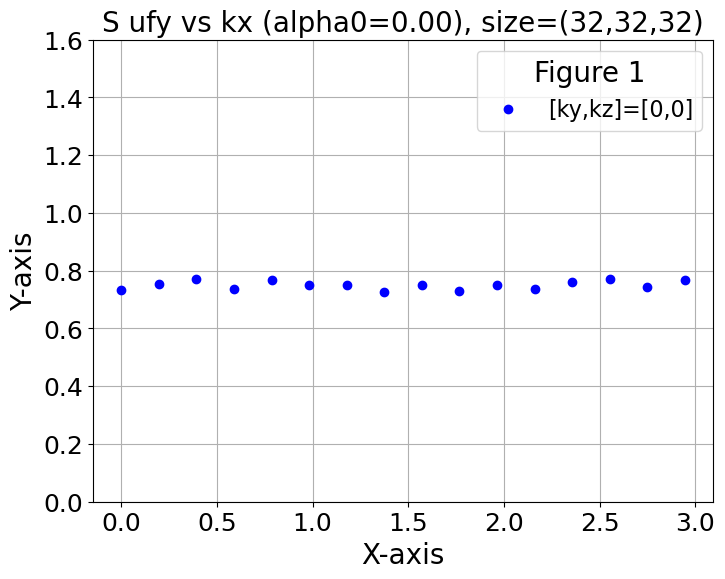

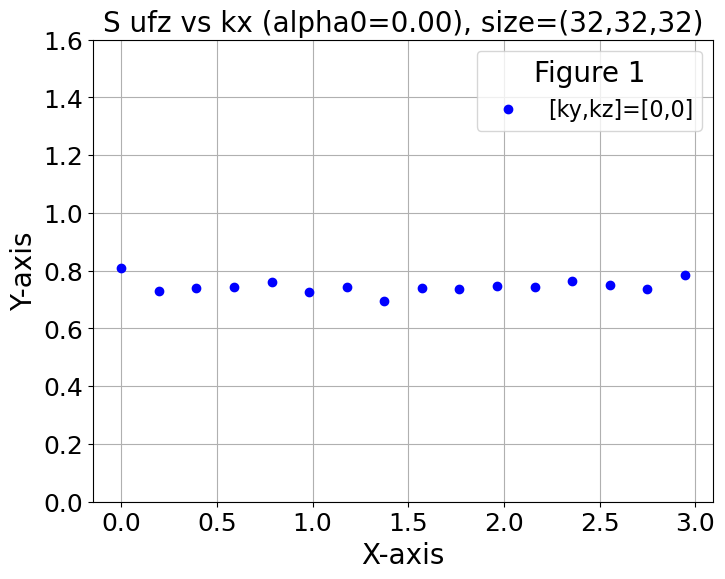

In [ ]:
import yt
from matplotlib import rc_context
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size': 20,           # General font size
    'axes.titlesize': 20,      # Axes title
    'axes.labelsize': 20,      # Axes labels
    'xtick.labelsize': 18,     # X-axis tick labels
    'ytick.labelsize': 18,     # Y-axis tick labels
    'legend.fontsize': 16,     # Legend
    'figure.titlesize': 18     # Figure title
})
print(yt.__version__)

############    modify if needed    ############################
step_SF = 500000
temperature = 1e-5
alpha0 = 0.
cs2 = 1./3.
nx = 32#64
ny = 32#2
nz = 32#2
#######################################################

plot_file_dir_SF_mag = "./data_mixture/plt_SF_mag00".format(nx,ny,nz) +\
              f"{step_SF:07d}" # total 9 digits number for step info 
plot_file_dir_SF_real_imag = "./data_mixture/plt_SF_real_imag00".format(nx,ny,nz) +\
              f"{step_SF:07d}"
ds = yt.load(plot_file_dir_SF_mag)
print(ds.field_list)
#profile_data = ds.all_data()[("boxlib", "struct_fact_rho_rho")].to_ndarray()
profile_data = ds.covering_grid(
    level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions
)
S_rho_FHDeX = profile_data["boxlib", "struct_fact_rhoA_rhoA"] # magnitude
S_phi_FHDeX = profile_data["boxlib", "struct_fact_rhoB_rhoB"] # magnitude
S_ufx_FHDeX = profile_data["boxlib", "struct_fact_uAx_uAx"] # magnitude
S_ufy_FHDeX = profile_data["boxlib", "struct_fact_uAy_uAy"] # magnitude 
S_ufz_FHDeX = profile_data["boxlib", "struct_fact_uAz_uAz"] # magnitude
  
#S_ufyx_FHDeX = profile_data["boxlib", "struct_fact_ufy_ufx"] # magnitude 
#S_ufzy_FHDeX = profile_data["boxlib", "struct_fact_ufz_ufy"] # magnitude 

print((S_rho_FHDeX/(temperature/cs2)))

box = ds.domain_dimensions
nxh = box[0]//2
kx = 2*np.pi/box[0]*(np.linspace(0, nxh-1, nxh))
'''
S_rho_array_kx = np.mean(S_rho_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,:,:], axis=(1, 2))/(temperature/cs2)
S_phi_array_kx = np.mean(S_phi_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,:,:], axis=(1, 2))/(temperature/cs2)
S_ufx_array_kx = np.mean(S_ufx_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,:,:], axis=(1, 2))/(temperature)
S_ufy_array_kx = np.mean(S_ufy_FHDeX[:,nxh%box[0]:(2*nxh-1)%box[0]+1,:], axis=(0, 2))/(temperature)
S_ufz_array_kx = np.mean(S_ufz_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,:,:], axis=(1, 2))/(temperature)
S_ufyx_array_kx = np.mean(S_ufyx_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,:,:], axis=(1, 2))/(temperature)
S_ufzy_array_kx = np.mean(S_ufzy_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,:,:], axis=(1, 2))/(temperature)
'''
S_rho_array_kx = S_rho_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,0,0]/(temperature/cs2)
S_phi_array_kx = S_phi_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,0,0]/(temperature/cs2)
S_ufx_array_kx = S_ufx_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,0,0]/(temperature)
S_ufy_array_kx = S_ufy_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,0,0]/(temperature)
S_ufz_array_kx = S_ufz_FHDeX[nxh%box[0]:(2*nxh-1)%box[0]+1,0,0]/(temperature)


plt.figure(1, figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(kx, S_rho_array_kx, label="[ky,kz]=[0,0]", marker='o', linestyle='', color='b') 
plt.legend(title="Figure 1")

plt.xlabel("X-axis")  # X-axis label
plt.ylabel("Y-axis")  # Y-axis label
plt.title("S rho vs kx (alpha0={:.2f}), size=({:d},{:d},{:d})".format(alpha0,nx,ny,nz))  # Plot title
plt.ylim(0,1.2)
plt.grid(True)
#plt.savefig('rho_f.png')  # You can use .png, .jpg, .pdf, .svg, etc.


plt.figure(2, figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(kx, S_phi_array_kx, label="[ky,kz]=[0,0]", marker='o', linestyle='', color='b') 
plt.legend(title="Figure 1")

plt.xlabel("X-axis")  # X-axis label
plt.ylabel("Y-axis")  # Y-axis label
plt.title("S phi vs kx (alpha0={:.2f}), size=({:d},{:d},{:d})".format(alpha0,nx,ny,nz))  # Plot title
plt.ylim(0,1.2)
plt.grid(True)
#plt.savefig('rho_g.png')

plt.figure(3, figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(kx, S_ufx_array_kx, label="[ky,kz]=[0,0]", marker='o', linestyle='', color='b') 
plt.legend(title="Figure 1")

plt.xlabel("X-axis")  # X-axis label
plt.ylabel("Y-axis")  # Y-axis label
plt.title("S ufx vs kx (alpha0={:.2f}), size=({:d},{:d},{:d})".format(alpha0,nx,ny,nz))  # Plot title
plt.ylim(0,1.6)
plt.grid(True)
#plt.savefig('ufx.png')

plt.figure(4, figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(kx, S_ufy_array_kx, label="[ky,kz]=[0,0]", marker='o', linestyle='', color='b') 
plt.legend(title="Figure 1")

plt.xlabel("X-axis")  # X-axis label
plt.ylabel("Y-axis")  # Y-axis label
plt.title("S ufy vs kx (alpha0={:.2f}), size=({:d},{:d},{:d})".format(alpha0,nx,ny,nz))  # Plot title
plt.ylim(0,1.6)
plt.grid(True)
#plt.savefig('ufy.png')

plt.figure(5, figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(kx, S_ufz_array_kx, label="[ky,kz]=[0,0]", marker='o', linestyle='', color='b') 
plt.legend(title="Figure 1")

plt.xlabel("X-axis")  # X-axis label
plt.ylabel("Y-axis")  # Y-axis label
plt.title("S ufz vs kx (alpha0={:.2f}), size=({:d},{:d},{:d})".format(alpha0,nx,ny,nz))  # Plot title
plt.ylim(0,1.6)
plt.grid(True)
#plt.savefig('ufz.png')

# Show the plot
plt.show()
#plt.savefig('my_plot.png', dpi=300)